### Trend Following | Cruzamento de Médias Móveis
#### Período de análise: Janeiro de 2017 até Março de 2021.
##### Autor: Saulo Brendo Alves de Jesus 
##### LinkedIn: linkedin.com/in/saulo-brendo/

### Importar bibliotecas

In [1]:
# Importar bibliotecas necessárias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_datareader import data
import warnings
warnings.simplefilter("ignore")

### Obter dados via API do Yahoo Finance

In [2]:
# Definir ativo
ticker = "BTC-USD"

# Definindo período
init_data = '1/1/2017'
end_data = "31/03/2021"

# Solicitação de dados através da API
dados_ativo = data.DataReader(ticker,'yahoo',init_data,end_data)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008.0,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992.0,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000.0,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984.0,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008.0,1013.380005


In [3]:
# Estatística Descritiva dos Retornos
dados_ativo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1548 entries, 2017-01-01 to 2021-03-31
Data columns (total 6 columns):
High         1548 non-null float64
Low          1548 non-null float64
Open         1548 non-null float64
Close        1548 non-null float64
Volume       1548 non-null float64
Adj Close    1548 non-null float64
dtypes: float64(6)
memory usage: 84.7 KB


### Adicionar valores de Médias Móveis 

In [4]:
# Definir valor das Médias Móveis rápida e lenta
FastMA = 5
SlowMA = 20

# Criar coluna com os valores das Médias Móveis
dados_ativo['Fast MA'] = np.round(dados_ativo['Adj Close'].rolling(window=FastMA).mean(),2)
dados_ativo['Slow MA'] = np.round(dados_ativo['Adj Close'].rolling(window=SlowMA).mean(),2)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,Fast MA,Slow MA
Date,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008.0,998.325012,NaN,NaN
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992.0,1021.750000,NaN,NaN
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000.0,1043.839966,NaN,NaN
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984.0,1154.729980,NaN,NaN
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008.0,1013.380005,1046.4,NaN


### Visualização

Text(0, 0.5, 'Preço da unidade em Dólar')

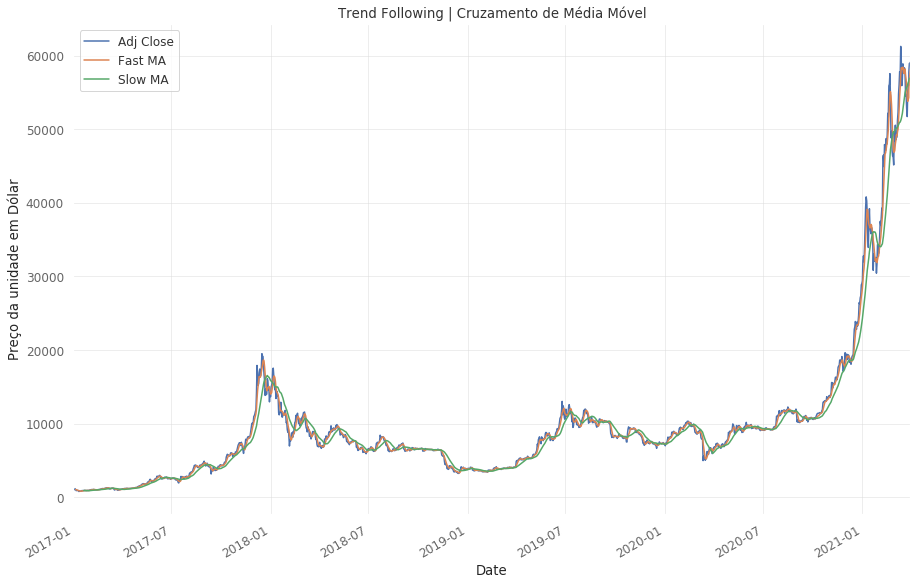

In [5]:
# Plotar gráfico contendo Preço Ajustado, Média Móvel Rápida e Média Móvel Lenta.
dados_ativo[['Adj Close', 'Fast MA', 'Slow MA']].plot(grid = True, figsize = (15,10))
plt.pyplot.title("Trend Following | Cruzamento de Média Móvel")
plt.pyplot.ylabel("Preço da unidade em Dólar")

### Regras de Trading

In [6]:
# Comprado
dados_ativo['Sinal'] = np.where(dados_ativo['Fast MA'] > dados_ativo['Slow MA'], 1, 0)

# Neutro
dados_ativo['Sinal'] = np.where(dados_ativo['Slow MA'] >= dados_ativo['Fast MA'], 0, dados_ativo['Sinal'])

# Calcular dias comprados e neutros
dados_ativo['Sinal'].value_counts()

1    915
0    633
Name: Sinal, dtype: int64

### Retornos

In [7]:
# Calcular retorno logarítmico do ativo
dados_ativo['Retornos'] = np.log(dados_ativo['Adj Close'] / dados_ativo['Adj Close'].shift(1))

# Calcular retorno de acordo com a posição
dados_ativo['CMA Strategy'] = dados_ativo['Retornos'] * dados_ativo['Sinal'].shift(1)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,Fast MA,Slow MA,Sinal,Retornos,CMA Strategy
Date,,,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008.0,998.325012,NaN,NaN,0,NaN,NaN
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992.0,1021.750000,NaN,NaN,0,0.023193,0.0
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000.0,1043.839966,NaN,NaN,0,0.021389,0.0
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984.0,1154.729980,NaN,NaN,0,0.100960,0.0
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008.0,1013.380005,1046.4,NaN,0,-0.130575,-0.0


In [8]:
# Estatística Descritiva dos Retornos
dados_ativo['Retornos'].describe()

count    1547.000000
mean        0.002638
std         0.042793
min        -0.464730
25%        -0.014629
50%         0.002629
75%         0.021380
max         0.225119
Name: Retornos, dtype: float64

### Visualização de Retornos acumulados

In [9]:
# Criar Data Frame contendo retornos do Buy N' Hold e Estratégia
comp_retornos = pd.DataFrame({
    'Buy and Hold': dados_ativo['Retornos'],
    'CMA Strategy': dados_ativo['CMA Strategy']
})

# Calcular os Retornos acumulados
comp_retornos = (1 + comp_retornos).cumprod()
comp_retornos.tail()

,Buy and Hold,CMA Strategy
Date,,
2021-03-28,12.868457,30.398529
2021-03-28,13.275809,30.398529
2021-03-29,13.541519,30.398529
2021-03-30,13.541781,30.398529
2021-03-31,13.582396,30.489701


Text(0.5, 1.0, 'Retorno Acumulado | Buy N Hold vs CMA Strategy')

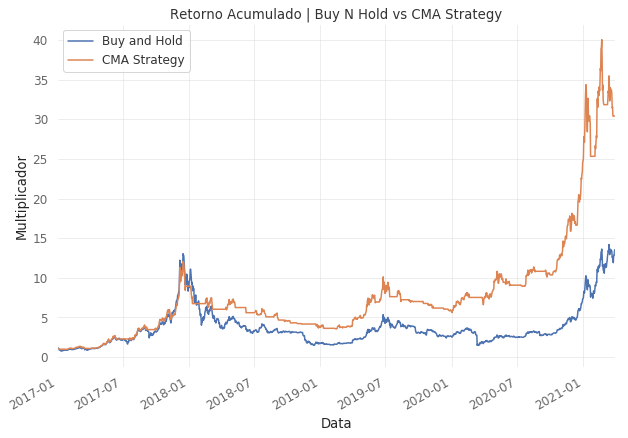

In [10]:
# Visualização de Retorno Acumulado Buy N Hold vs CMA Strategy
comp_retornos.plot(figsize = (10,7))
plt.pyplot.xlabel('Data')
plt.pyplot.ylabel('Multiplicador')
plt.pyplot.title("Retorno Acumulado | Buy N Hold vs CMA Strategy")